Для датасета California Housing:
1) Разбейте датасет на тренировочную, валидационную и тестовую выборку

2) Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

3) Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

4) В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

5) Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)



In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [76]:
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [77]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [78]:
housing_dummies = pd.get_dummies(housing_df,columns = ['ocean_proximity'])
housing_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [79]:
housing_dummies['average_rooms'] = housing_dummies['total_rooms']/housing_dummies['households']
housing_dummies['average_bedrooms'] = housing_dummies['total_bedrooms']/housing_dummies['households']

housing_dummies = housing_dummies.drop(['total_rooms','total_bedrooms'], axis=1)
housing_dummies

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


In [80]:
print(sum(housing_dummies['average_bedrooms'].isnull()))

housing_train_val, housing_test =  train_test_split( housing_dummies, test_size =0.1)
housing_train, housing_val =  train_test_split( housing_train_val, test_size =0.1)

train_mean = np.median(housing_train['average_bedrooms'].dropna().to_numpy())

housing_train.loc[housing_train['average_bedrooms'].isnull(),'average_bedrooms'] = train_mean
housing_test.loc[housing_test['average_bedrooms'].isnull(),'average_bedrooms'] = train_mean
housing_val.loc[housing_val['average_bedrooms'].isnull(),'average_bedrooms'] = train_mean

print(sum(housing_val['average_bedrooms'].isnull()))

207
0


In [81]:
train_columns = [housing_train[['longitude']],housing_train[['latitude']]]
test_columns = [housing_test[['longitude']],housing_test[['latitude']]]
val_columns = [housing_val[['longitude']],housing_val[['latitude']]]

scaler1 = preprocessing.StandardScaler().fit(train_columns[0])
scaler2 = preprocessing.StandardScaler().fit(train_columns[1])

housing_train['longitude'] = scaler1.transform(train_columns[0])
housing_train['latitude'] = scaler2.transform(train_columns[1])

housing_test['longitude'] = scaler1.transform(test_columns[0])
housing_test['latitude'] = scaler2.transform(test_columns[1])

housing_val['longitude'] = scaler1.transform(val_columns[0])
housing_val['latitude'] = scaler2.transform(val_columns[1])

housing_train['longitude'].to_numpy().std(axis = 0)

1.0

In [82]:
housing_val['longitude'].to_numpy().std(axis = 0)

1.014952727846508

Для датасета Davis:
1) Удалите некорректные данные

2) Выделите тестовую выборку из 50 экземпляров

3) На тренировочных данных постройте:

Гистограмму height
Гистограмму weight
Эти же гистограммы для разных полов

4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. Сделайте аналогичный график на тестовой выборке



In [83]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import seaborn as sns

In [93]:
davis_df = pd.read_csv('Davis.csv')
davis_df = davis_df.loc[davis_df['weight'] > 45]
davis_df = davis_df.loc[davis_df['height'] > 135]
davis_df = davis_df.loc[davis_df['weight'] < 120]
davis_df = davis_df.loc[davis_df['height'] < 210]
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [94]:
davis_train, davis_test = train_test_split(davis_df, test_size = 50, stratify=davis_df['sex'])

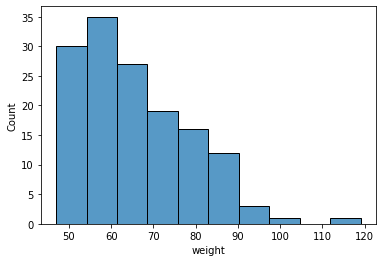

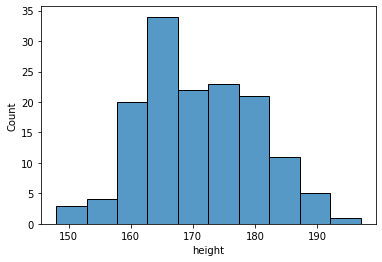

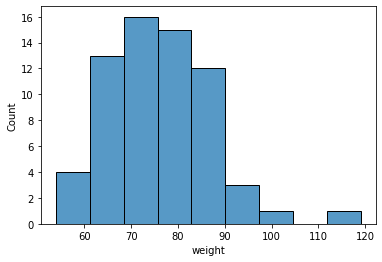

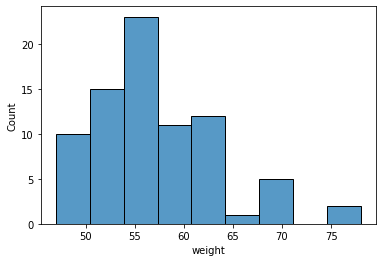

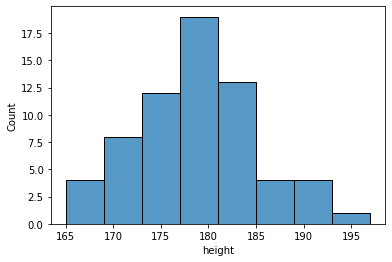

<AxesSubplot:xlabel='height', ylabel='Count'>

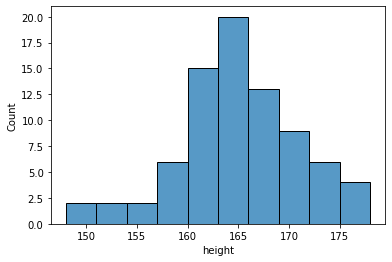

In [95]:
sns.histplot(davis_train['weight'])
plt.show()
sns.histplot(davis_train['height'])
plt.show()
sns.histplot(davis_train.loc[davis_train['sex'] =='M','weight'])
plt.show()
sns.histplot(davis_train.loc[davis_train['sex'] =='F','weight'])
plt.show()
sns.histplot(davis_train.loc[davis_train['sex'] =='M','height'])
plt.show()
sns.histplot(davis_train.loc[davis_train['sex'] =='F','height'])

In [96]:
log_reg = LogisticRegression()
qdanalysis = QuadraticDiscriminantAnalysis()

x_train = davis_train[['height','weight']]
y_train = davis_train['sex'] == 'M'

log_reg.fit(x_train,y_train)
qdanalysis.fit(x_train,y_train)

x_test = davis_test[['height','weight']]
y_test = davis_test['sex'] == 'M'

print(accuracy_score(log_reg.predict(x_train), y_train))
print(accuracy_score(log_reg.predict(x_test), y_test))
print(accuracy_score(qdanalysis.predict(x_train), y_train))
print(accuracy_score(qdanalysis.predict(x_test), y_test))

0.9166666666666666
0.88
0.9097222222222222
0.88


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


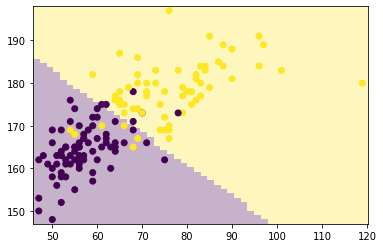

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


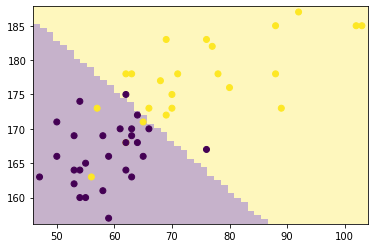

In [97]:
x1_min, x1_max = x_train['weight'].min()-0.5, x_train['weight'].max()+0.5
x2_min, x2_max = x_train['height'].min()-0.5, x_train['height'].max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_train['weight'], x_train['height'], c = y_train)
plt.show()
x1_min, x1_max = x_test['weight'].min()-0.5, x_test['weight'].max()+0.5
x2_min, x2_max = x_test['height'].min()-0.5, x_test['height'].max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(x_test['weight'], x_test['height'], c = y_test)
plt.show()

Для датасета CCPP.

1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

2) Постройте регрессионную модель.  Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.

3) Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t. 


In [98]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [99]:
ccpp_df = pd.read_excel('CCPP.xlsx')
ccpp_train_val, ccpp_test = train_test_split(ccpp_df, test_size=0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size=0.1)

In [100]:
lin_reg = LinearRegression()
X_train, y_train = ccpp_train.drop("PE",axis=1), ccpp_train['PE']
lin_reg.fit(X_train, y_train)
print(r2_score(ccpp_val['PE'], lin_reg.predict(ccpp_val.drop("PE",axis=1))))
print(mean_absolute_error(ccpp_val['PE'], lin_reg.predict(ccpp_val.drop("PE",axis=1))))

0.9272621432350048
3.56144637949389


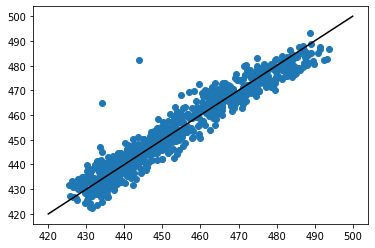

In [101]:
ax = plt.gca()
ax.set_xlim((420, 500))
ax.set_ylim((420, 500))
ax.cla()


plt.scatter(ccpp_val['PE'], lin_reg.predict(ccpp_val.drop("PE",axis=1)))
plt.plot(np.linspace(420,500),np.linspace(420,500), c = 'black')